In [5]:
import pandas as pd
import numpy as np

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from urllib import request
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, auc, confusion_matrix, classification_report, accuracy_score, precision_recall_curve, f1_score

from sklearn.linear_model import LogisticRegression as LGR
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB as GNB


%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None
# %load_ext rpy2.ipython

random_state = 1337

In [228]:
raw_df = pd.read_csv('./_sc2_47_PT.csv', index_col=0)
df = raw_df.copy().loc[:,:'win']

categorical_columns = df.columns[[t in ['object','bool'] for t in df.dtypes]]
continuous_columns = df.columns.difference(categorical_columns)

df.head(30)

,match_id,map_name,region,game_length,frame,second,race,ap30s,minerals_current,vespene_current,minerals_collection_rate,vespene_collection_rate,workers_active_count,minerals_used_in_progress,vespene_used_in_progress,minerals_used_current,vespene_used_current,minerals_lost,vespene_lost,minerals_killed,vespene_killed,food_used,food_made,minerals_used_active_forces,vespene_used_active_forces,win
0,1,World of Sleepers LE,us,437,3360,210,T,170.8,145,20,1147,156,22,725,150,2175,50,0,0,0,0,25.0,31.0,100,50,True
1,1,World of Sleepers LE,us,437,3360,210,P,126.0,75,75,979,313,24,700,125,2250,0,0,0,0,0,27.0,31.0,0,0,False
2,1,World of Sleepers LE,us,437,5280,330,T,130.2,170,165,1651,358,30,625,125,4050,300,50,50,0,0,49.0,54.0,500,50,True
3,1,World of Sleepers LE,us,437,5280,330,P,135.8,195,206,1679,313,40,675,75,4075,275,0,0,50,50,47.0,54.0,225,75,False
4,1,World of Sleepers LE,us,437,5760,360,T,126.0,120,227,1651,313,34,700,50,4625,425,50,50,0,0,55.0,62.0,775,175,True
5,1,World of Sleepers LE,us,437,5760,360,P,124.6,245,47,1875,313,43,325,225,5025,400,0,0,50,50,52.0,70.0,375,200,False
6,1,World of Sleepers LE,us,437,6720,420,T,140.0,70,45,2043,470,40,675,250,5600,400,275,125,50,0,62.0,70.0,750,100,True
7,1,World of Sleepers LE,us,437,6720,420,P,140.0,210,178,811,246,45,450,0,5800,850,50,0,275,125,61.0,78.0,800,500,False
8,1,World of Sleepers LE,us,437,7680,480,T,142.8,317,195,2183,627,45,400,50,6925,700,325,125,175,50,79.0,94.0,1300,350,True
9,1,World of Sleepers LE,us,437,7680,480,P,127.4,195,156,1987,649,51,950,200,6125,900,175,50,325,125,74.0,86.0,725,550,False


In [152]:
df[df['match_id'] == 2]

# [30,51]

,match_id,map_name,region,game_length,frame,second,race,ap30s,minerals_current,vespene_current,minerals_collection_rate,vespene_collection_rate,workers_active_count,minerals_used_in_progress,vespene_used_in_progress,minerals_used_current,vespene_used_current,minerals_lost,vespene_lost,minerals_killed,vespene_killed,food_used,food_made,minerals_used_active_forces,vespene_used_active_forces,win
30,2,Thunderbird LE,us,414,2880,180,P,148.4,240,164,979,201,22,600,0,2000,0,0,0,0,0,23.0,31.0,0,0,True
31,2,Thunderbird LE,us,414,2880,180,P,163.8,185,140,895,335,24,200,50,2400,0,0,0,0,0,28.0,31.0,0,0,False
32,2,Thunderbird LE,us,414,3360,210,P,123.2,100,22,979,313,24,725,200,2250,0,0,0,0,0,27.0,31.0,0,0,True
33,2,Thunderbird LE,us,414,3360,210,P,148.4,150,102,951,313,24,450,150,2400,0,0,0,0,0,28.0,31.0,0,0,False
34,2,Thunderbird LE,us,414,3840,240,P,126.0,25,88,1035,313,26,475,200,2875,50,0,0,0,0,32.0,46.0,125,50,True
35,2,Thunderbird LE,us,414,3840,240,P,134.4,225,168,951,313,24,550,200,2700,50,0,0,0,0,32.0,39.0,200,50,False
36,2,Thunderbird LE,us,414,4320,270,P,138.6,160,54,1119,335,28,400,150,3250,250,50,0,0,0,35.0,46.0,250,100,True
37,2,Thunderbird LE,us,414,4320,270,P,138.6,225,284,979,313,24,500,0,3100,250,0,0,50,0,34.0,39.0,450,150,False
38,2,Thunderbird LE,us,414,4800,300,P,149.8,168,120,1091,313,28,675,200,3350,250,50,0,100,25,38.0,46.0,250,100,True
39,2,Thunderbird LE,us,414,4800,300,P,145.6,20,146,895,291,24,675,250,3350,225,100,25,50,0,36.0,47.0,600,125,False


In [224]:
match_ids = np.unique(df.match_id)
idk = []

for mid in match_ids:
    curr_match = df[df.match_id == mid]
    idk.append({
        'match_id': mid,
        'protoss_mean_vespene_used_current': curr_match[curr_match.race == 'P'].dropna()['vespene_used_current'].dropna().mean(),
        'protoss_median_vespene_used_current': curr_match[curr_match.race == 'P'].dropna()['vespene_used_current'].dropna().median(),
        'zerg_mean_vespene_used_current': curr_match[curr_match.race == 'Z'].dropna()['vespene_used_current'].dropna().mean(),
        'zerg_median_vespene_used_current': curr_match[curr_match.race == 'Z'].dropna()['vespene_used_current'].dropna().median()
    })

pd.DataFrame(idk)

,match_id,protoss_mean_vespene_used_current,protoss_median_vespene_used_current,zerg_mean_vespene_used_current,zerg_median_vespene_used_current
0,0,NaN,NaN,620.833333,312.5
1,2,437.500000,350.0,NaN,NaN
2,5,2446.739130,2225.0,1835.869565,1850.0
3,6,540.277778,562.5,NaN,NaN
4,10,3376.351351,3600.0,NaN,NaN
5,12,800.000000,712.5,150.000000,0.0
6,14,1992.045455,1825.0,NaN,NaN
7,16,NaN,NaN,1501.470588,1475.0
8,18,2764.062500,2975.0,NaN,NaN
9,19,478.571429,437.5,NaN,NaN


In [232]:
map_df = df.groupby(['race'], as_index=False)
map_df = map_df['minerals_current'].mean().sort_values('minerals_current', ascending=False).reset_index(drop=True)
map_df

,race,minerals_current
0,P,443.860911
1,T,263.115489


In [90]:
map_df = df.groupby(['race','map_name'], as_index=False)
map_df = map_df['minerals_used_current'].mean().sort_values('minerals_used_current', ascending=False).reset_index(drop=True)
map_df

,race,map_name,minerals_used_current
0,Z,World of Sleepers LE,14112.148760
1,P,World of Sleepers LE,13319.302326
2,Z,Disco Bloodbath LE,12151.500000
3,P,Disco Bloodbath LE,11952.625000
4,Z,Thunderbird LE,10956.100000
5,P,Acropolis LE,10572.233607
6,P,Thunderbird LE,10273.026316
7,Z,Acropolis LE,8749.809524
8,Z,Triton LE,7248.355263
9,Z,Winter's Gate LE,6796.428571


In [130]:
counter = {'Z': 0, 'P': 0}
for v in df.loc[:,['race','win']].values:
    counter[v[0]] += int(v[1])
counter

{'Z': 405, 'P': 638}

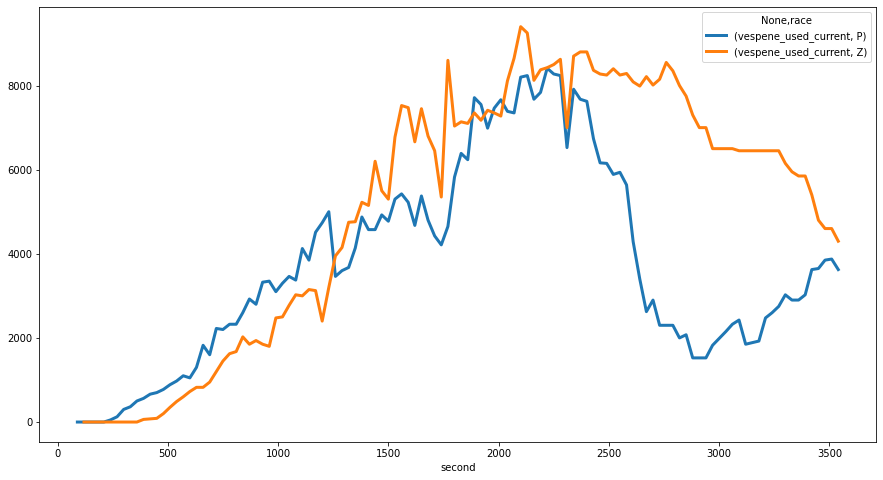

In [116]:
s = pd.DataFrame(df[['second','race','vespene_used_current']].groupby(['second', 'race'])['race','vespene_used_current'].median().unstack())
s.plot(figsize=(15,8), linewidth=3)
plt.show()

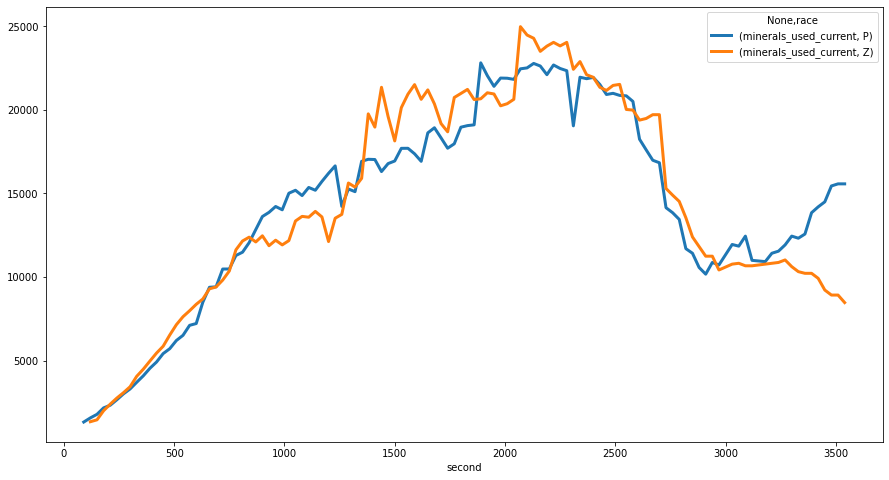

In [94]:
s = pd.DataFrame(df[['second','race','minerals_used_current']].groupby(['second', 'race'])['race','minerals_used_current'].mean().unstack())
s.plot(figsize=(15,8), linewidth=3)
plt.show()

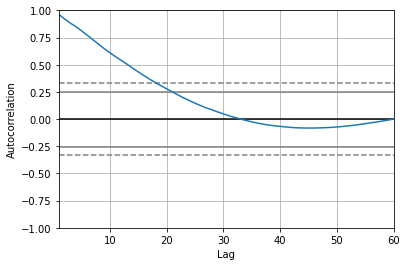

In [229]:
minerals_types = df.groupby('second')['second','minerals_current', 'minerals_collection_rate','minerals_used_in_progress','minerals_used_current','minerals_lost','minerals_killed','minerals_used_active_forces'].mean().dropna()
pd.plotting.autocorrelation_plot(minerals_types)
plt.show()

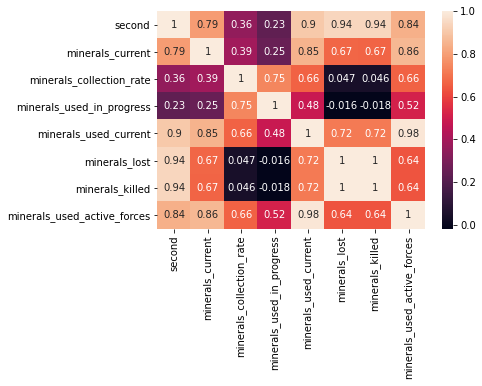

In [230]:
sns.heatmap(minerals_types.corr(), annot=True)
plt.show()

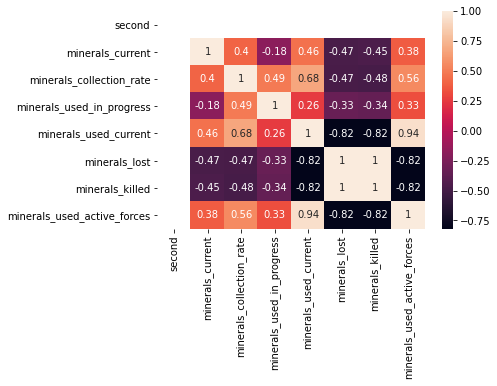

In [231]:
sns.heatmap(minerals_types.diff().corr(), annot=True)
plt.show()

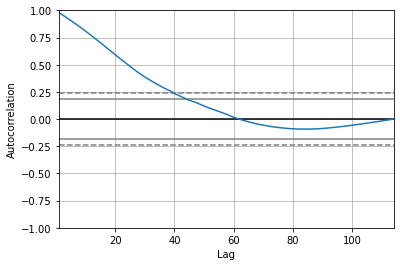

In [103]:
vespene_types = df.groupby('second')['second','vespene_current', 'vespene_collection_rate','vespene_used_in_progress','vespene_used_current','vespene_lost','vespene_killed','vespene_used_active_forces'].mean().dropna()
pd.plotting.autocorrelation_plot(vespene_types)
plt.show()

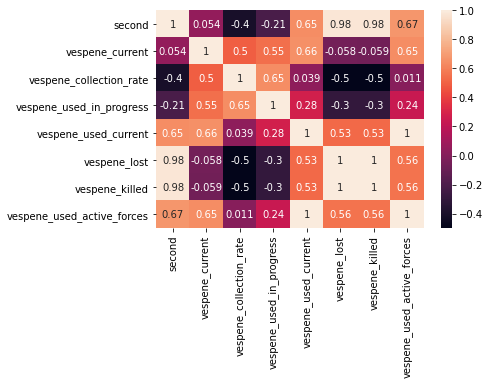

In [104]:
sns.heatmap(vespene_types.corr(), annot=True)
plt.show()

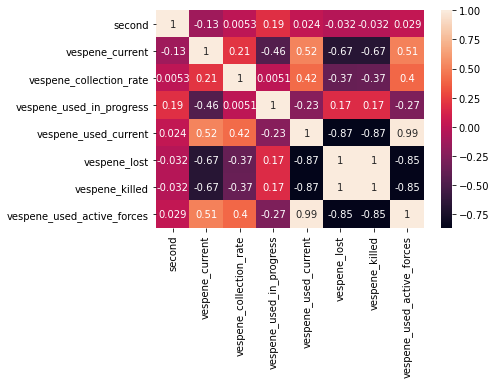

In [105]:
sns.heatmap(vespene_types.diff().corr(), annot=True)
plt.show()

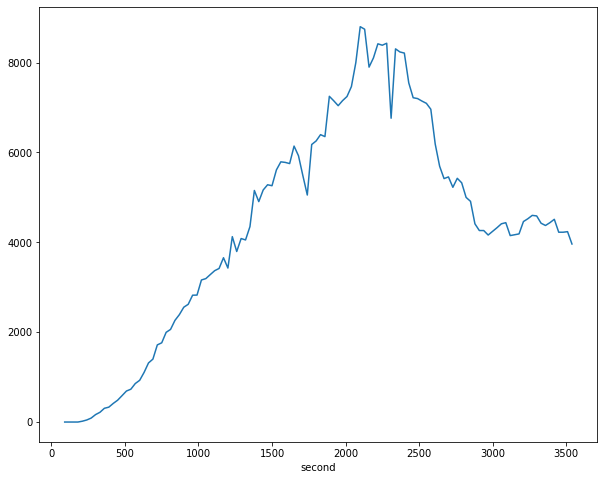

In [191]:
s_df = df.groupby('second')['vespene_used_current'].mean().dropna()
s_df.plot(figsize=(10,8))
plt.show()

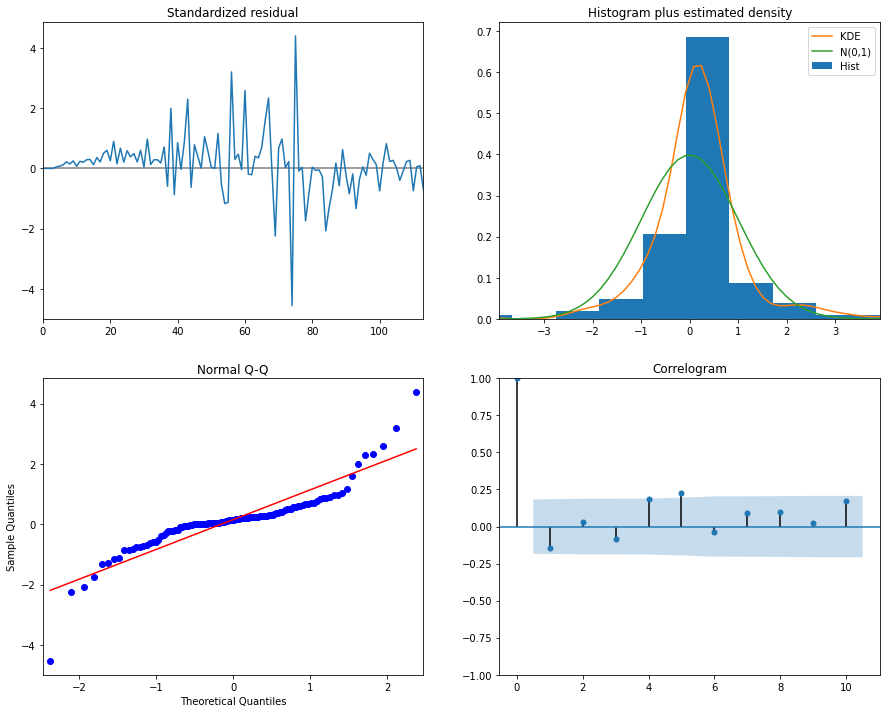

In [202]:
import statsmodels.api as sm
import warnings

warnings.filterwarnings('ignore')
arima_model = sm.tsa.statespace.SARIMAX(s_df)

arima_model = arima_model.fit()
arima_model.plot_diagnostics(figsize=(15,12))
plt.show()

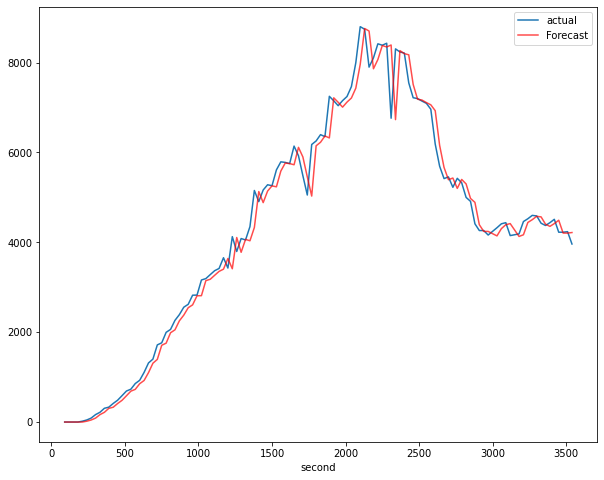

In [205]:
pred = arima_model.get_prediction(dynamic=False)
pred_ci = pred.conf_int()

ax = s_df.plot(label='actual', figsize=(10,8))
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=0.7, color='red')
plt.legend()
plt.show()

In [159]:
# since svm's are based around euclidean distance we will
# be one-hot encoding our categorical features
df_ohe = pd.get_dummies(df.copy(), columns=categorical_columns, drop_first=True)

# get_dummies renames response to response_>50K
# so, renaming it back to response
df_ohe.rename(columns={'win_True':'win'}, inplace=True)

X = df_ohe.loc[:,df_ohe.columns.difference(['win'])].to_numpy()
y = df_ohe.loc[:,'win'].to_numpy()

X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(X, y, test_size=.2, random_state=random_state)
X_test_ohe = X[30:((30+52)//2)]
y_test_ohe = y[30:((30+52)//2)]

In [160]:
# tree models tend to perform better when not one-hot encoding
df_cat = df.copy()
for col in categorical_columns:
    df_cat[col] = df_cat[col].astype('category').cat.codes

X = df_cat.loc[:,df_cat.columns.difference(['win'])].to_numpy()
y = df_cat.loc[:,'win'].to_numpy()

X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X, y, test_size=.2, random_state=random_state)
X_test_cat = X[30:((30+52)//2)]
y_test_cat = y[30:((30+52)//2)]

In [161]:
def get_model(model, X_train=None, y_train=None, X_test=None, y_test=None, tag=''):
    m = eval(model)()
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    print('{} {} | {} {}'.format('-'*5,model,tag,'-'*5))
    print('What is the test error of the model obtained? %.4f' % (1-np.mean(y_pred == y_test)))
    print('Revenue predicted classes from %s model:' % model)
    for row in confusion_matrix(y_test, y_pred): print(row)
    print()
    
    return m

In [162]:
data = {'ohe': {}, 'cat': {}}
for k in data:
    data[k]['tag'] = k
    for name in ['X_train', 'y_train', 'X_test', 'y_test']:
        data[k][name] = eval('{}_{}'.format(name,k))

for k in data:
    lgr_model = get_model('LGR', **data[k])
    lda_model = get_model('LDA', **data[k])
    qda_model = get_model('QDA', **data[k])
    gnb_model = get_model('GNB', **data[k])

----- LGR | ohe -----
What is the test error of the model obtained? 0.6364
Revenue predicted classes from LGR model:
[1 4]
[3 3]

----- LDA | ohe -----
What is the test error of the model obtained? 0.3636
Revenue predicted classes from LDA model:
[1 4]
[0 6]

----- QDA | ohe -----
What is the test error of the model obtained? 0.4545
Revenue predicted classes from QDA model:
[0 5]
[0 6]

----- GNB | ohe -----
What is the test error of the model obtained? 0.5455
Revenue predicted classes from GNB model:
[5 0]
[6 0]

----- LGR | cat -----
What is the test error of the model obtained? 0.6364
Revenue predicted classes from LGR model:
[1 4]
[3 3]

----- LDA | cat -----
What is the test error of the model obtained? 0.4545
Revenue predicted classes from LDA model:
[0 5]
[0 6]

----- QDA | cat -----
What is the test error of the model obtained? 0.4545
Revenue predicted classes from QDA model:
[4 1]
[4 2]

----- GNB | cat -----
What is the test error of the model obtained? 0.5455
Revenue predict